======================================================================================================================================================================================================================================
# <center>Creating a Value-Buy Smartphone: Insights from Leading Brand</center>


### <center>Name  : Catherine Helenna Mulyadi</center>

======================================================================================================================================================================================================================================

## I. PROBLEM IDENTIFICATION

#### 1. **THEME**

##### <center>Creating a Value-Buy Smartphone: Insights from Leading Brand</center>

#### 2. **PROBLEM STATEMENT**

Create a new smartphone product with price range from 1 to 5 million IDR for catering market needs in two quarters. This objective will be achieved by finding common smartphone features found in the products and investigating which smartphone brands take lead on market.

#### 3. **BACKGROUND**

A lot of Indonesian citizens are tech-lovers; they just cannot resist the temptation of changing their smartphones periodically when a new version has been released. Some considerations to get a new smartphone include design, camera, and specs. With that being said, current smartphones are increasing in variety, fulfilling market demands based on affordability. As the saying goes, there is a price for a value, customers still would like to purchase a value-buy smartphone so it would not bring too much financial problems.

Your company, X, would like to innovate a new smartphone product with a reasonable quality and price so it can label the product as "value buy" for the next release campaign. Your company has been producing smartphones for economic level (price range from 0.5 to 1 million IDR) and wondering to set up a slightly higher price to gain more revenue with its brand new product.

As a data analyst working in company X, you should dig more information about other smartphone brands so you can help your company figuring out what are key features it should include in its new product and how to set up a good price.<br>

#### 4. **PROBLEM DESCRIPTION**

1. Get at least 60 data about smartphone sales from web scraping on Tokopedia, is there any outlier values on each column in the dataset? Keep the clean data and please find the central tendency, dispersion, skewness, and kurtosis.

2. Which smartphone brands with price range 1 to 5 million IDR dominates the market? (This is depending on how many products are sold per brand, take top 2 brands)

3. Which city has the highest number of sales? Remember to convert the region name that contains the same word as same name. For example: Jakarta Timur, Jakarta Utara -> Jakarta. See if market competitiveness in a city can affect the number of sales. Key: market competition level in a city = number of smartphones sold / number of stores

4. How is the relationship between product price, product rating, and amount of product sold?

5. Make a word cloud from product name section to see which smartphone feature often pops up. Be sure to remove the brand names first so the word cloud will contain other key words.

6. What is the minimum and maximum price the company can set on their product? Hint: use confidence interval and select the suitable method based on data distribution.


In [4]:
# import necessary libraries
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
import math
from wordcloud import WordCloud

## II. WEBSCRAPING

In [17]:
# import necessary libraries
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

# create a dataset
data = pd.DataFrame()

# intiate driver to do webscrap
driver = webdriver.Safari()

In [18]:
# define function
def extract_values(list):
    count = 0
    list2 = []
    for item in list:
        list2.append(item.get_text().strip())
        count += 1
        if count == 2:
            break
    return list2

In [19]:
# convert nested list into list
def nested_list_converter(list3):
    flat_list = sum(list3, [])
    return flat_list

In [20]:
# Set the empty list to store the values
product_name = []
product_price = []
product_rating = []
store_loc = []
total_sold = []
# webscrap from multiple pages
for page in range(1,100,1):
    url = "https://www.tokopedia.com/search?page={}&pmax=5000000&pmin=1000000&q=hp&rf=true&srp_component_id=04.06.00.00".format(page)
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    list_productname = soup.find_all('div',{"class":"prd_link-product-name css-3um8ox","data-testid":"spnSRPProdName"})
    product_name.append(extract_values(list_productname))

    list_productprice = soup.find_all('div',{"class":"prd_link-product-price css-h66vau","data-testid":"spnSRPProdPrice"})
    product_price.append(extract_values(list_productprice))
                        
    list_productrate = soup.find_all('span',{"class":"prd_rating-average-text css-t70v7i","data-testid":""})
    product_rating.append(extract_values(list_productrate))

    list_store = soup.find_all('span',{"class":"prd_link-shop-loc css-1kdc32b flip","data-testid":"spnSRPProdTabShopLoc"})
    store_loc.append(extract_values(list_store))

    list_totalsold = soup.find_all('span',{"class":"prd_label-integrity css-1sgek4h","data-testid":""})
    total_sold.append(extract_values(list_totalsold))


product_name = nested_list_converter(product_name)
product_price = nested_list_converter(product_price)
product_rating = nested_list_converter(product_rating)
store_loc = nested_list_converter(store_loc)
total_sold = nested_list_converter(total_sold)

print(len(product_name))
print(len(product_price))
print(len(product_rating))
print(len(store_loc))
print(len(total_sold))

driver.close()

196
196
196
196
196


In [21]:
# CREATE DATASET WITH DICTIONARY FROM
data = {"Product Name": product_name, "Store Location":store_loc, "Product Price" : product_price, "Total Sold": total_sold,"Product Rating":product_rating}

# CONVERT DATA TO DATAFRAME
df = pd.DataFrame(data)

df

,Product Name,Store Location,Product Price,Total Sold,Product Rating
0,OPPO A98 5G 8/256 GB Garansi Resmi + Full Bonus,Jakarta Pusat,Rp4.299.000,20 terjual,5.0
1,Vivo Y16 4/64 GB Garansi Resmi,Cirebon,Rp1.189.000,24 terjual,5.0
2,Vivo Y27 5G 6/128GB NFC Dimensity 6020 50MP Ka...,Jakarta Utara,Rp2.299.000,22 terjual,5.0
3,VIVO Y17S RAM 6/128 GB GARANSI RESMI VIVO INDO...,Tangerang,Rp1.679.160,14 terjual,5.0
4,OPPO A18 8/128GB ( 4GB + 4GB EXTENDED RAM ) GA...,Bekasi,Rp1.799.000,1 terjual,5.0
...,...,...,...,...,...
191,Vivo Y27s NFC 8/256 GB 8/128 GB Garansi Resmi ...,Jakarta Pusat,Rp1.993.000,100+ terjual,4.9
192,OPPO A17 8/64GB ( 4GB + 4GB EXTENSION RAM ) GA...,Bekasi,Rp2.099.000,9 terjual,5.0
193,VIVO V29e 5G 8/256 RAM 8 ROM 256 GB 8GB 256GB ...,Jakarta Utara,Rp3.785.000,3 terjual,5.0
194,VIVO Y36 5G | NFC | RAM 8/256 GB GARANSI RESMI...,Tangerang,Rp2.889.000,8 terjual,4.8


In [22]:
# keep raw file to csv, do not include index
df.to_csv("raw_data.csv",index = False)

## III. DATA LOADING AND CLEANING

In [23]:
# load data from csv file

raw_data = pd.read_csv("/Users/catherinemulyadi/Data Science Projects/Handphone-Price-Analysis/raw_data.csv")

# check first 5 data
raw_data.head()

,Product Name,Store Location,Product Price,Total Sold,Product Rating
0,OPPO A98 5G 8/256 GB Garansi Resmi + Full Bonus,Jakarta Pusat,Rp4.299.000,20 terjual,5.0
1,Vivo Y16 4/64 GB Garansi Resmi,Cirebon,Rp1.189.000,24 terjual,5.0
2,Vivo Y27 5G 6/128GB NFC Dimensity 6020 50MP Ka...,Jakarta Utara,Rp2.299.000,22 terjual,5.0
3,VIVO Y17S RAM 6/128 GB GARANSI RESMI VIVO INDO...,Tangerang,Rp1.679.160,14 terjual,5.0
4,OPPO A18 8/128GB ( 4GB + 4GB EXTENDED RAM ) GA...,Bekasi,Rp1.799.000,1 terjual,5.0


#### **RAW DATA UNDERSTANDING:**
- The data contains various information related smartphone products with price range 1 to 5 million IDR.

- The product information include product name, location of the store,  price, total sold, and product rating.

In [24]:
# check data type
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    196 non-null    object 
 1   Store Location  196 non-null    object 
 2   Product Price   196 non-null    object 
 3   Total Sold      196 non-null    object 
 4   Product Rating  196 non-null    float64
dtypes: float64(1), object(4)
memory usage: 7.8+ KB


#### **INSIGHT:**
- There are total of 196 data for all columns.

- For further analysis, the product price and total sold should be converted into integer data type.

- Since product price and total sold section has some strings on it, please remove and just take the numbers. We will consider total number of products sold as the number only for convenience.

In [57]:
# make copy of raw data 
clean_data = raw_data.copy()

In [58]:
# removal of unnecessary strings from column "Product Price"
# use regex = True to permanently change the data
clean_data['Product Price'] = clean_data['Product Price'].replace('Rp',"",regex = True)
# use backslash symbol before '.' to ensure the removal is the string value of "."
clean_data['Product Price'] = clean_data['Product Price'].replace('\.',"", regex = True)

# conversion of data type
clean_data['Product Price'] = clean_data['Product Price'].astype(int)

# check data type for 'Product Price'
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    196 non-null    object 
 1   Store Location  196 non-null    object 
 2   Product Price   196 non-null    int64  
 3   Total Sold      196 non-null    object 
 4   Product Rating  196 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.8+ KB



#### **INSIGHT:**
- Successful conversion for data type of "Product Price" from string to integer.

In [59]:
# removal of unnecessary string values in 'Total Sold'
clean_data['Total Sold'] = clean_data['Total Sold'].replace('\+',"", regex = True)
clean_data['Total Sold'] = clean_data['Total Sold'].replace('terjual',"", regex = True)
clean_data['Total Sold'] = clean_data['Total Sold'].replace(' ',"", regex = True)
clean_data['Total Sold'] = clean_data['Total Sold'].replace('rb',"000", regex = True)

# conversion of data type into int
clean_data['Total Sold'] = clean_data['Total Sold'].astype(int)

# check data type for 'Total Sold'
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    196 non-null    object 
 1   Store Location  196 non-null    object 
 2   Product Price   196 non-null    int64  
 3   Total Sold      196 non-null    int64  
 4   Product Rating  196 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.8+ KB


#### **INSIGHT:**
- Successful conversion for data type of "Total Sold" from string to integer.

#### **PROBLEM DETECTED:**
the problem is the user using keyword 'hp' which is often translated as the brand HP
and the brand HP has a lot of printer toner products, which are not smartphones so you have to remove it!

In [60]:
# remove the product name with key word: Toner, Drum
remove_keys = ['Toner','Drum']
# with this, you would make remove_keys as a boolean condition if the product name contains a word either 'Toner' or 'Drum'
filter_clean_data = clean_data[clean_data['Product Name'].str.contains('|'.join(remove_keys), case = False)]

# get index you want to drop
filter_clean_data

,Product Name,Store Location,Product Price,Total Sold,Product Rating
7,Drum catridge hp laserjet 824A black original,Jakarta Selatan,1650000,100,4.9
23,Drum catridge hp laserjet 824A black original,Jakarta Selatan,1650000,21,5.0
34,Drum catridge hp laserjet 828A colour original,Jakarta Selatan,3450000,4,5.0
35,HP Toner 16A Black hp,Jakarta Selatan,2810100,30,4.7
55,Drum catridge hp laserjet 824A black original,Jakarta Selatan,1650000,7,5.0
62,HP Toner 16A Black,Jakarta Selatan,2958000,100,4.9
63,Toner Catridge HP laserJet W9030MC Balack Orig...,Jakarta Selatan,2850000,30,4.7
76,Drum catridge hp laserjet 824A black original,Jakarta Selatan,1650000,40,5.0
77,HP Toner 16A Black hp,Jakarta Selatan,2810100,1,5.0
89,Toner Catridge hp Laserjet W9190MC Black original,Jakarta Selatan,1550000,27,5.0


#### **INSIGHT:**
- So, there are 14 data to remove which contains unrelated information.

In [61]:
# so now, the clean data will be

clean_data = clean_data.drop(index = filter_clean_data.index)

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 0 to 195
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    165 non-null    object 
 1   Store Location  165 non-null    object 
 2   Product Price   165 non-null    int64  
 3   Total Sold      165 non-null    int64  
 4   Product Rating  165 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.7+ KB


In [62]:
# add new column for brand name by take the first word from the product name
# key: remove the word new so you can get the first word: the brand
# change the first letters into caps so it's easier to group the data later on.
clean_data['Product Name'] = clean_data['Product Name'].str.replace("New", "", regex=True, case=False)

# replace word HP
clean_data['Product Name'] = clean_data['Product Name'].str.replace("HP", "", regex=True, case=False)

# give uppercase for the whole name of the product
clean_data['Product Name'] = clean_data['Product Name'].str.upper()

# get the first word for the data value in "Brand" column, put next to the product name
# use insert to specifically put the new column next to "Product Name"
clean_data.insert(1,"Brand Name", clean_data['Product Name'].str.split().str[0])

clean_data

,Product Name,Brand Name,Store Location,Product Price,Total Sold,Product Rating
0,OPPO A98 5G 8/256 GB GARANSI RESMI + FULL BONUS,OPPO,Jakarta Pusat,4299000,20,5.0
1,VIVO Y16 4/64 GB GARANSI RESMI,VIVO,Cirebon,1189000,24,5.0
2,VIVO Y27 5G 6/128GB NFC DIMENSITY 6020 50MP KA...,VIVO,Jakarta Utara,2299000,22,5.0
3,VIVO Y17S RAM 6/128 GB GARANSI RESMI VIVO INDO...,VIVO,Tangerang,1679160,14,5.0
4,OPPO A18 8/128GB ( 4GB + 4GB EXTENDED RAM ) GA...,OPPO,Bekasi,1799000,1,5.0
...,...,...,...,...,...,...
191,VIVO Y27S NFC 8/256 GB 8/128 GB GARANSI RESMI ...,VIVO,Jakarta Pusat,1993000,100,4.9
192,OPPO A17 8/64GB ( 4GB + 4GB EXTENSION RAM ) GA...,OPPO,Bekasi,2099000,9,5.0
193,VIVO V29E 5G 8/256 RAM 8 ROM 256 GB 8GB 256GB ...,VIVO,Jakarta Utara,3785000,3,5.0
194,VIVO Y36 5G | NFC | RAM 8/256 GB GARANSI RESMI...,VIVO,Tangerang,2889000,8,4.8


In [ ]:
# convert to csv file
clean_data.to_csv("clean_data.csv", index = False)

#### **INSIGHT:**
- Now, there are 165 clean data ready for use.

## IV. ANALYSIS AND CALCULATION METHODS

#### 0. **PREPARATION BEFORE ANALYSIS**

**INSTALLING WORDCLOUD ON NOTEBOOK**

In [5]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


**IMPORT NECESSARY LIBRARIES**

In [13]:
clean_data = pd.read_csv('clean_data.csv')

#### 1. **PERFORMING DESCRIPTIVE STATISTICS CALCULATION AND OUTLIER DETECTION**

In [9]:
# show descriptive statistics results
def desc_statistics(df_name,col_name):
    df_name_sorted = df_name.sort_values(by=col_name)
    try:
        # Attempt to convert col_name to a string, and check if it's in columns
        col_name_str = str(col_name)
        df_name_sorted = df_name.sort_values(by=col_name_str)

        # calculation process
        round_mean = round(df_name_sorted[col_name].mean(),2)
        round_median = round(df_name_sorted[col_name].median(),2)
        round_std = round(df_name_sorted[col_name].std(),2)
        round_skew = round(df_name_sorted[col_name].skew(),2)
        round_kurtosis = round(df_name_sorted[col_name].kurtosis(),2)
    
        # showing output
        print(f"This is the descriptive statistics result of column {col_name}:")
        print(f"Mean: {round_mean}")
        print(f"Median: {round_median}")
        print(f"Standard deviation: {round_std}")
        print(f"Skewness: {round_skew}")
        print(f"Kurtosis: {round_kurtosis}")
        print("\n")
    except (KeyError, TypeError):
        print("Invalid column name. Please provide a valid string.")

In [10]:
# check how many outliers with Tukey's rule
def outlier_check(df_name, col_name):
    try:
        df_name_sorted = df_name.sort_values(by=col_name)

        q1 = df_name_sorted[col_name].quantile(0.25)
        q3 = df_name_sorted[col_name].quantile(0.75)
        iqr = q3-q1

        up_bound = q3 + 1.5*iqr
        low_bound = q1 - 1.5*iqr
        outlier = df_name_sorted[col_name][(df_name_sorted[col_name]<low_bound) | (df_name_sorted[col_name]>up_bound)]
        print(f"There are {len(outlier)} outlier data in the set.")
    except (KeyError, TypeError):
        print("Invalid column name. Please provide a valid string.")


In [11]:
# normality test with D'Agostino's K-squared test:
def normality_test(df_name, col_name):
    res = stats.normaltest(df_name[col_name])
    print(f'p-value: {res.pvalue}') #ga normal
    if res.pvalue > 0.05:
        print('Data has normal distribution.')
    else:
        print('Data has no normal distribution.')

In [12]:
# for column Product Price
desc_statistics(clean_data,'Product Price')
outlier_check(clean_data,'Product Price')
normality_test(clean_data,'Product Price')

This is the descriptive statistics result of column Product Price:
Mean: 2358097.83
Median: 2135000.0
Standard deviation: 904750.08
Skewness: 0.56
Kurtosis: -0.61


There are 0 outlier data in the set.
p-value: 0.0016224358243166297
Data has no normal distribution.


In [13]:
# for column Total Sold
desc_statistics(clean_data,'Total Sold')
outlier_check(clean_data,'Total Sold')
normality_test(clean_data,'Total Sold')

This is the descriptive statistics result of column Total Sold:
Mean: 25.41
Median: 8.0
Standard deviation: 38.09
Skewness: 3.08
Kurtosis: 13.5


There are 16 outlier data in the set.
p-value: 4.29064397229166e-30
Data has no normal distribution.


In [14]:
# for column Product Rating
desc_statistics(clean_data,'Product Rating')
outlier_check(clean_data,'Product Rating')
normality_test(clean_data,'Product Rating')

This is the descriptive statistics result of column Product Rating:
Mean: 4.86
Median: 5.0
Standard deviation: 0.5
Skewness: -5.0
Kurtosis: 25.66


There are 13 outlier data in the set.
p-value: 9.773781811572945e-44
Data has no normal distribution.


#### **INSIGHT:**

- The descriptive statistics were applied on three data columns: 'Product Price', 'Product Rating', and 'Total Sold'.

- On 'Product Price', it's found that the mean price was Rp.2,358,097 and the median price was Rp. 2,135,000. The price variation in the samples was relatively small as standard deviation was Rp.904,750, that was still lower than mean. The data was moderately right skewed since skewness is 0.56. Next, the data has a slight platykurtic distribution (kurtosis = -0.61)  in which lighter tail and flatter peak was observed with 0 outliers. Finally, the D'Agostino's K-squared normality test result confirmed that the data has no normal distribution.

- On 'Total Sold', it's found that the mean amount of items sold was 25.41 items and the median was 8 items. The variation of total product sold in the samples was relatively large as standard deviation was 38.09, which was higher than mean. The data was right skewed since skewness is 3.08. Next, the data has a leptokurtic distribution (kurtosis = 13.5) in which heavier tail and higher peak was observed, indicating existence of extreme values. The data has 16 outliers. Finally, theD'Agostino's K-squared normality test result confirmed that the data has no normal distribution.

- On 'Product Rating', it's found that the mean product rating was 4.86 while the median was 5. The product rating data variation was relatively small as standard deviation was 0.5, which was less than mean. The data was left skewed since skewness is -5.0. Next, the data has a leptokurtic distribution (kurtosis = 25.66) in which heavier tail and higher peak was observed, indicating existence of extreme values with 13 outliers. The data has 16 outliers. Finally, the D'Agostino's K-squared normality test result confirmed that the data has no normal distribution.

#### 2. **THE TOP 2 BRANDS WHICH ARE DOMINATING THE MARKET BASED ON TOTAL NUMBER OF SALES**

In [26]:
# make copy of clean data
dominating_brands = clean_data.copy()

# filter and create new dataset
dominating_brands = pd.DataFrame(dominating_brands.groupby('Brand Name')['Total Sold'].sum())

# rename the column Total Sold
dominating_brands = dominating_brands.rename(columns={'Total Sold': 'Sum of Total Sold'})

# sort from highest to lowest total number of sales
dominating_brands_sorted = dominating_brands.sort_values(by='Sum of Total Sold', ascending= False)

# show dataframe
dominating_brands_sorted

,Sum of Total Sold
Brand Name,
VIVO,2631
OPPO,975
REALME,362
REDMI,223
T.E.R.E.A,1


In [27]:
# create function to calculate the corresponding percentage values for pie chart building
def pie_calculator(data):
    keeper = []
    total = sum(data)
    for i in data:
        calculator = (i/total)*100
        keeper.append(calculator)
    return keeper

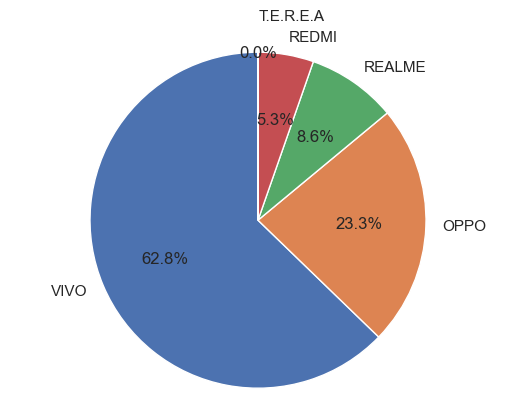

In [28]:
# convert into pie chart
labels = ['VIVO','OPPO','REALME','REDMI','T.E.R.E.A']
proportion_size = pie_calculator(dominating_brands_sorted['Sum of Total Sold'])

# plot to pie chart
# autopct to set the percentage format of each proportion
# pctdistance to adjust distance of labels from center point of pie
fig,ax = plt.subplots()
wedges,texts, autotexts = ax.pie(proportion_size, labels=labels, autopct='%1.1f%%', startangle=90)

# Index of the label you want to adjust
index_to_adjust = labels.index('T.E.R.E.A')


# Adjust the position of the specified label
angle = texts[index_to_adjust].get_position()
distance = 1.10 # Adjust this value to control radial distance based on your preference
distance1 = 0.90  # Adjust this value to control radial distance based on your preference


x = distance * angle[0]  # Calculate x-coordinate
y = distance * angle[1]  # Calculate y-coordinate

x1 = distance1 * angle[0]  # Calculate x-coordinate for value position
y1 = distance1 * angle[1]  # Calculate y-coordinate for value position

texts[index_to_adjust].set_position((x, y))  # Set new position for the label

# call autotext for accessing percentage values
autotexts[index_to_adjust].set_position((x1, y1))  # Set new position for the autopct label


# to set up a circular pie chart
plt.axis('equal')

# show the plot result
plt.show()

In [29]:
# convert dataframe to csv
dominating_brands_sorted.to_csv('pie_brands.csv')

#### **INSIGHT:**
- VIVO has the highest sum of total sold products at 2631 items, followed by OPPO at 975 items, REALME at 362 items, REDMI at 223 items, and T.E.R.E.A at 1 item.
- Based on this result, it is concluded that VIVO and OPPO are top two most dominating companies in the market for smartphone with price range 1 to 5 million IDR.
- Based on the pie chart, VIVO dominates the smartphone market by taking the proportion of total sales at 62.8%, followed by OPPO at 23.3%, REALME at 8.6%, REDMI at 5.3%, and T.E.R.E.A < 1%.
- Therefore, VIVO and OPPO are the top two brands taking a leading position in the smartphone market with price range from 1 to 5 million IDR.

#### 3. **REGION HAVING THE LEAST MARKET COMPETITION LEVEL**

- One way to decide market competition level is defined by how many smartphones sold per store in each city. The higher the number of smartphones sold per store means the less the market competition since each store can sell more smartphones.

- However, we still need to consider the number of smartphones sold as well as number of stores to understand the size of market demand in each city.

In [20]:
region_df = clean_data.copy()

# filter data and create a new dataframe
# use aggregate function to make groupings and put results in multiple columns
region_df = pd.DataFrame(region_df.groupby('Store Location').agg(sum_of_total_sold=("Total Sold","sum"), store_count =('Store Location','count')))

region_df_sorted = region_df.reset_index()


region_df_sorted

,Store Location,sum_of_total_sold,store_count
0,Bandung,5,5
1,Bekasi,184,19
2,Cirebon,49,3
3,Depok,34,3
4,Jakarta Barat,354,15
5,Jakarta Pusat,1567,17
6,Jakarta Selatan,21,1
7,Jakarta Timur,101,7
8,Jakarta Utara,1318,52
9,Kab. Bekasi,8,2


In [5]:
# confirm which columns exist in the dataframe
print(region_df_sorted.columns)

Index(['Store Location', 'sum_of_total_sold', 'store_count'], dtype='object')


In [21]:
# convert names of the city containing same words into one
# Jakarta
region_df_sorted.loc[region_df_sorted['Store Location'].str.contains('Jakarta'),'Store Location']='Jakarta'

# Tangerang
region_df_sorted.loc[region_df_sorted['Store Location'].str.contains('Tangerang'),'Store Location']='Tangerang'

# Bekasi
region_df_sorted.loc[region_df_sorted['Store Location'].str.contains('Bekasi'),'Store Location']='Bekasi'

region_df_sorted

,Store Location,sum_of_total_sold,store_count
0,Bandung,5,5
1,Bekasi,184,19
2,Cirebon,49,3
3,Depok,34,3
4,Jakarta,354,15
5,Jakarta,1567,17
6,Jakarta,21,1
7,Jakarta,101,7
8,Jakarta,1318,52
9,Bekasi,8,2


In [22]:
# group sum of total smartphones sold and number of stores based on cities
new_region_df = region_df_sorted.copy()
new_region_df =  pd.DataFrame(new_region_df.groupby('Store Location').agg(sum_of_total_sold=("sum_of_total_sold","sum"), store_count =('store_count','sum')))

# rename the columns
new_region_df.rename(columns={'sum_of_total_sold':'Sum of Total Sold'},inplace = True)
new_region_df.rename(columns={'store_count':'Number of Stores'},inplace = True)

# add new column: ratio Sum of Total Sold to Number of Stores for measure of market competition level
new_region_df['Sum of Total Sold / Number of Stores'] = (new_region_df['Sum of Total Sold']/new_region_df['Number of Stores']).round(2)

# sort from highest to lowest based on the ratio
new_region_df = new_region_df.sort_values(by='Sum of Total Sold / Number of Stores', ascending= False)

new_region_df  = new_region_df.reset_index()

new_region_df

,Store Location,Sum of Total Sold,Number of Stores,Sum of Total Sold / Number of Stores
0,Mojokerto,140,2,70.00
1,Kab. Demak,100,2,50.00
2,Jakarta,3361,92,36.53
3,Sukabumi,117,4,29.25
4,Cirebon,49,3,16.33
5,Kab. Sleman,30,2,15.00
6,Medan,27,2,13.50
7,Depok,34,3,11.33
8,Bekasi,192,21,9.14
9,Tangerang,81,13,6.23


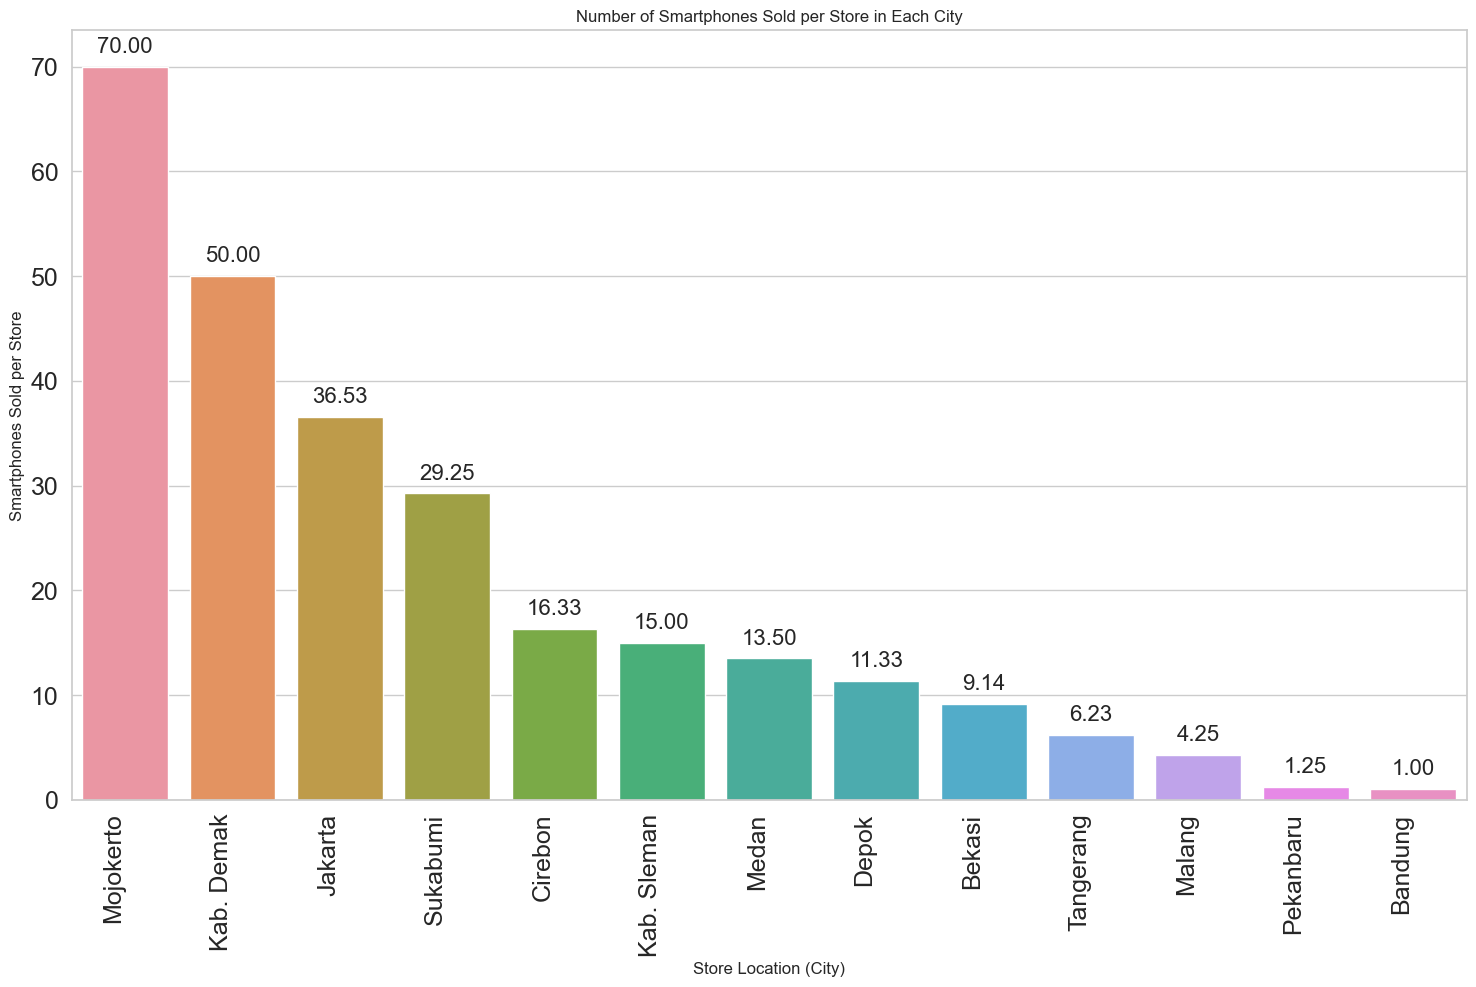

In [23]:
# make the bar graph with multiple y axis
# set style with seaborn
sns.set(style='whitegrid')

# prepare data
data_bar = new_region_df.reset_index()

# define figure size
plt.figure(figsize =(18,10))

# input data for plotting
ax = sns.barplot(x='Store Location', y='Sum of Total Sold / Number of Stores',data=data_bar)

# Set font size for axis labels
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Rotate x-axis labels horizontally
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Labelling values on bar graph
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 1, f'{height:.2f}', ha='center', va='bottom', fontsize = 16)

# labelling graph figure
plt.title('Number of Smartphones Sold per Store in Each City')
plt.xlabel('Store Location (City)')
plt.ylabel('Smartphones Sold per Store')

# Show the final plot
plt.show()


In [24]:
# convert dataframe to csv
new_region_df.to_csv('bar_data_city.csv')

#### **INSIGHT:**
- There are 13 cities with online stores selling smartphones.

- Jakarta stands out with the highest total smartphones sold (3361 items) and the highest number of online stores (92). Jakarta also holds the third highest number of smartphones sold per store at 36.53 on bar graph, indicating it still has a good market competitiveness level for the online smartphone market. It is an expected result since Jakarta is the current capital city of Indonesia, where population is bigger compared to other cities resulting to larger market size.

- In addition, Mojokerto (at 70) and Kab.Demak (at 50) are top two highest number of smartphones sold per store. Both regions are included in top 5 highest smartphone sellers and only have 2 online smartphone stores which means the market competition level is less than Jakarta. 

- In contrast, both Bandung and Pekanbaru recorded the lowest smartphone sales at 5 items each, with Bandung having 5 stores and Pekanbaru 4 stores. Both cities also has the lowest number of smartphones sold per store in which Pekanbaru is 1.25 while Bandung is 1. There can be several factors for this situation, such as market preference in purchasing smartphones at offline stores.

- Therefore, it is recommended to sell the smartphone in Mojokerto, Kab.Demak, and Jakarta considering market competition level as well as the market demand.

#### 4. **THE RELATIONSHIP BETWEEN PRODUCT PRICE, RATING, and TOTAL PRODUCT SOLD**

##### **NOTE:**

The null and alternative hypotheses for these correlation tests are defined as the following:
  - H0: No correlation if the correlation coefficient = 0
  - H1: Correlation exists if the correlation coefficient != 0

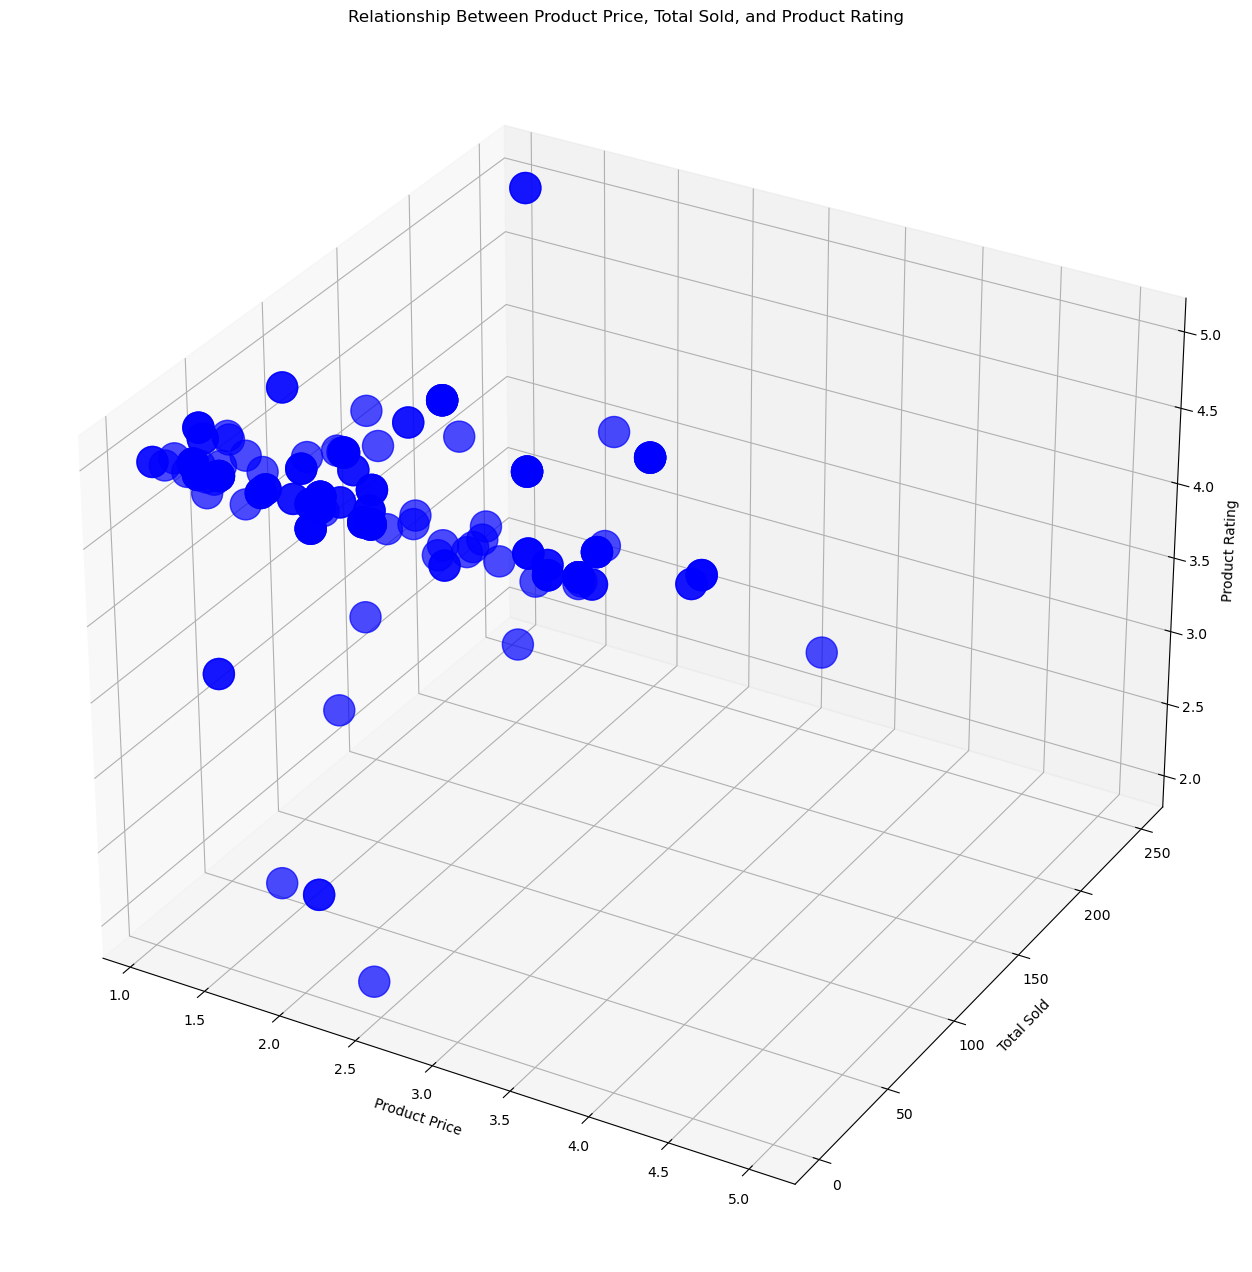

In [4]:
# Sample data
x = clean_data['Product Price']
y = clean_data['Total Sold']
z = clean_data['Product Rating']

# Create a 3D scatter plot
fig = plt.figure(figsize=(20, 16))
# to make the plot 3d, use subplot and projection
ax = fig.add_subplot(111, projection='3d')

# plotting process with blue data points
# s means size
ax.scatter(x, y, z, s=500, c='blue', marker='o', alpha=0.7)

# Set labels and title
ax.set_xlabel('Product Price')
ax.set_ylabel('Total Sold')
ax.set_zlabel('Product Rating')
ax.set_title('Relationship Between Product Price, Total Sold, and Product Rating')

# Show the plot
plt.show()

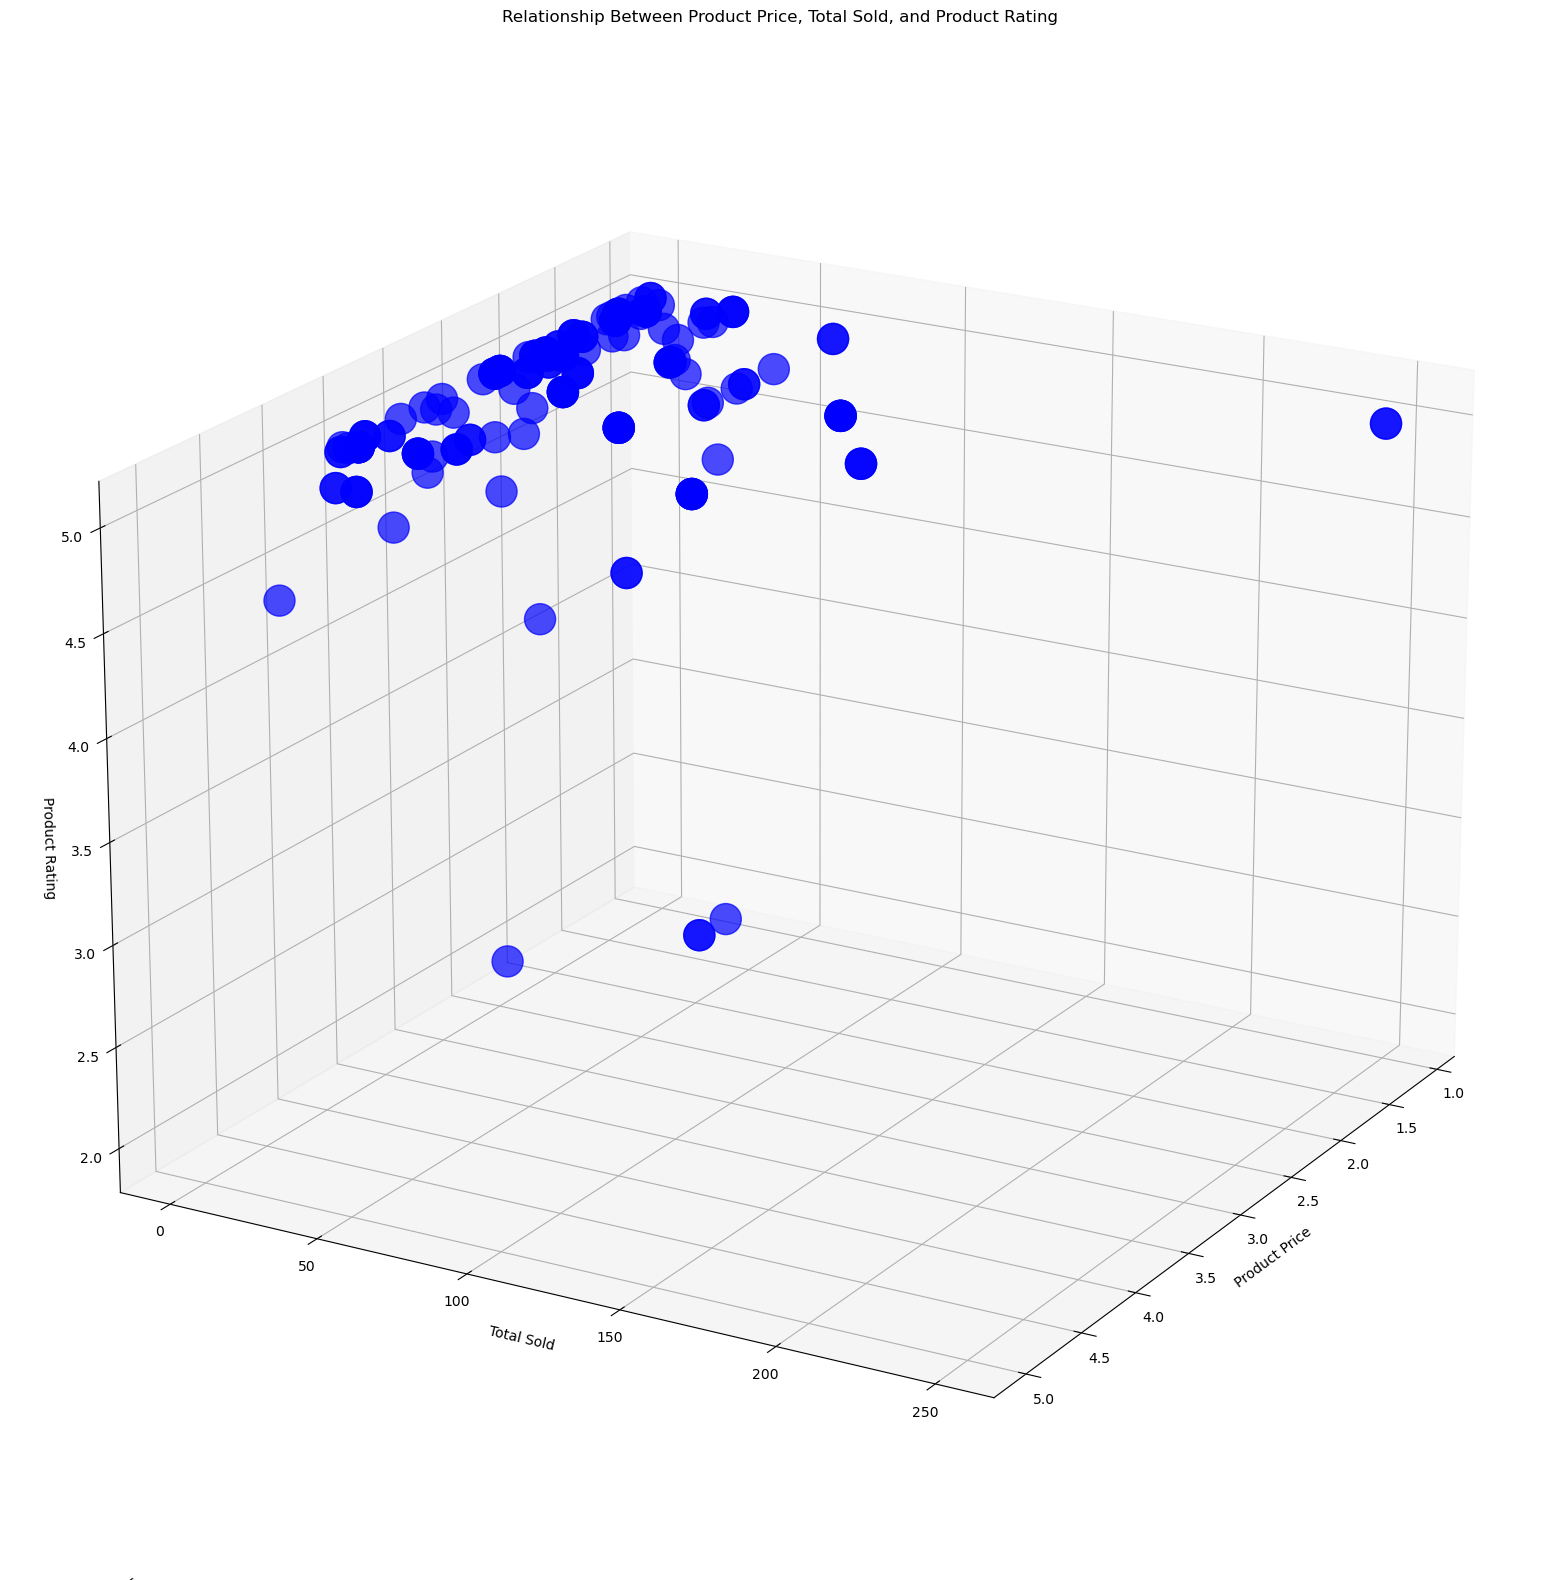

In [9]:
# Sample data
x = clean_data['Product Price']
y = clean_data['Total Sold']
z = clean_data['Product Rating']

# Create a 3D scatter plot
fig = plt.figure(figsize=(20, 20))
# to make the plot 3d, use subplot and projection
ax = fig.add_subplot(111, projection='3d')

# plotting process with blue data points
# s means size
ax.scatter(x, y, z, s=500, c='blue', marker='o', alpha=0.7)

# Set labels and title
ax.set_xlabel('Product Price')
ax.set_ylabel('Total Sold')
ax.set_zlabel('Product Rating')
ax.set_title('Relationship Between Product Price, Total Sold, and Product Rating')

# way to observe the plot from different angle
# azimuthal angle = azim =>represents rotation on z axis, elevation = elev
ax.view_init(azim=30,elev=20)

# show
plt.show()

In [30]:
# correlation test between price and total sold
corr_r,pval_p = stats.pearsonr(clean_data['Product Price'], clean_data['Total Sold'])
corr_rho, pval_s = stats.spearmanr(clean_data['Product Price'], clean_data['Total Sold'])
corr_tau, pval_k = stats.kendalltau(clean_data['Product Price'], clean_data['Total Sold'])

print(f"r-correlation coefficient: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation coefficient: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation coefficient: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation coefficient: -0.10, p-value: 0.19829899636726925
rho-correlation coefficient: -0.05, p-value: 0.4945423575196377
tau-correlation coefficient: -0.03, p-value: 0.5449239922894538


In [31]:
# correlation test between price and rating
corr_r,pval_p = stats.pearsonr(clean_data['Product Price'], clean_data['Product Rating'])
corr_rho, pval_s = stats.spearmanr(clean_data['Product Price'], clean_data['Product Rating'])
corr_tau, pval_k = stats.kendalltau(clean_data['Product Price'], clean_data['Product Rating'])

print(f"r-correlation coefficient: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation coefficient: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation coefficient: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation coefficient: 0.13, p-value: 0.1071787911990451
rho-correlation coefficient: 0.03, p-value: 0.6807501399054304
tau-correlation coefficient: 0.03, p-value: 0.6724134936997852


In [32]:
# correlation test between total sold and rating
corr_r,pval_p = stats.pearsonr(clean_data['Total Sold'], clean_data['Product Rating'])
corr_rho, pval_s = stats.spearmanr(clean_data['Total Sold'], clean_data['Product Rating'])
corr_tau, pval_k = stats.kendalltau(clean_data['Total Sold'], clean_data['Product Rating'])

print(f"r-correlation coefficient: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation coefficient: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation coefficient: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation coefficient: -0.03, p-value: 0.6582805672614414
rho-correlation coefficient: -0.28, p-value: 0.000252627595224321
tau-correlation coefficient: -0.22, p-value: 0.0005367478963863423


#### **INSIGHT AFTER IMPLEMENTING TESTS AND CREATED A 3D SCATTER PLOT:**

##### **Observation from Scatter Plot**
- There was a negative correlation observed between total sold and product rating.
- There were no clear correlations between product price and total sold as well as product price and rating.

Hence, further analysis such as correlation tests is important to confirm these observations.

##### **Discussion about Correlation Test Results**

1. The correlation test results between price and total sold indicates no correlations at all since all the p-values from each test are above 0.05, the critical point, indicating no statistically significant relationship between the variables.

  - Pearson(r:-0.10, p-val: 0.19829899636726925)
  - Spearman(rho:-0.05, p-val: 0.4945423575196377)
  - Kendall-tau(tau:-0.03,p-val: 0.5449239922894538)

2. The correlation test results between price and rating indicates no correlations at all since all the p-values from each test are above 0.05, the critical point, showing no statistically significant relationship between the variables.

  - Pearson(r:0.13, p-val: 0.1071787911990451)
  - Spearman(rho:0.03, p-val: 0.6807501399054304)
  - Kendall-tau(tau:0.03,p-val: 0.6724134936997852)

3. The correlation test results between total sold and rating indicates no linear correlation since the p-value is above 0.05. Meanwhile, other tests indicate negative monotonic as well as rank relationships as the p-values are less than 0.05.

  - Pearson(r:-0.03, p-val: 0.6582805672614414)
  - Spearman(rho:-0.28, p-val: 0.000252627595224321)
  - Kendall-tau(tau:-0.22,p-val: 0.0005367478963863423)

Therefore, it can be inferred that there is only a statistically significant relationship between total sold and rating:

`
"As the total amount of smartphones sold increases, the product rating decreases."
`

This result indicates that aside from product rating, there are other factors influencing customer's purchasing decision.

#### **5. WORD CLOUD FROM PRODUCT NAME FOR FINDING MOST FREQUENTLY INCLUDED SMARTPHONE FEATURE**

- install wordcloud first: pip install matplotlib wordcloud


In [14]:
text_keeper = clean_data.copy()

text_keeper['Product Name'] = text_keeper['Product Name'].replace("VIVO","",regex = True)
text_keeper['Product Name'] = text_keeper['Product Name'].replace("OPPO","",regex = True)
text_keeper['Product Name'] = text_keeper['Product Name'].replace("REALME","",regex = True)
text_keeper['Product Name'] = text_keeper['Product Name'].replace("REDMI","",regex = True)
text_keeper['Product Name'] = text_keeper['Product Name'].replace("T.E.R.E.A","",regex = True)

text_keeper

,Product Name,Brand Name,Store Location,Product Price,Total Sold,Product Rating
0,A98 5G 8/256 GB GARANSI RESMI + FULL BONUS,OPPO,Jakarta Pusat,4299000,20,5.0
1,Y16 4/64 GB GARANSI RESMI,VIVO,Cirebon,1189000,24,5.0
2,Y27 5G 6/128GB NFC DIMENSITY 6020 50MP KAMERA...,VIVO,Jakarta Utara,2299000,22,5.0
3,Y17S RAM 6/128 GB GARANSI RESMI INDONESIA -...,VIVO,Tangerang,1679160,14,5.0
4,A18 8/128GB ( 4GB + 4GB EXTENDED RAM ) GARANS...,OPPO,Bekasi,1799000,1,5.0
...,...,...,...,...,...,...
160,Y27S NFC 8/256 GB 8/128 GB GARANSI RESMI Y17 ...,VIVO,Jakarta Pusat,1993000,100,4.9
161,A17 8/64GB ( 4GB + 4GB EXTENSION RAM ) GARANS...,OPPO,Bekasi,2099000,9,5.0
162,V29E 5G 8/256 RAM 8 ROM 256 GB 8GB 256GB SMAR...,VIVO,Jakarta Utara,3785000,3,5.0
163,Y36 5G | NFC | RAM 8/256 GB GARANSI RESMI IN...,VIVO,Tangerang,2889000,8,4.8


In [15]:
text_keeper2 = text_keeper['Product Name']
text_keeper2

0             A98 5G 8/256 GB GARANSI RESMI + FULL BONUS
1                              Y16 4/64 GB GARANSI RESMI
2       Y27 5G 6/128GB NFC DIMENSITY 6020 50MP KAMERA...
3       Y17S RAM 6/128 GB GARANSI RESMI  INDONESIA  -...
4       A18 8/128GB ( 4GB + 4GB EXTENDED RAM ) GARANS...
                             ...                        
160     Y27S NFC 8/256 GB 8/128 GB GARANSI RESMI Y17 ...
161     A17 8/64GB ( 4GB + 4GB EXTENSION RAM ) GARANS...
162     V29E 5G 8/256 RAM 8 ROM 256 GB 8GB 256GB SMAR...
163     Y36 5G | NFC | RAM 8/256 GB GARANSI RESMI  IN...
164     V29 V29E V27E BARU 100% ORIGINAL GARANSI RESM...
Name: Product Name, Length: 165, dtype: object

In [16]:
# convert series into list
list_text_keeper = text_keeper2.tolist()

# Make into a string
string_text = " ".join(list_text_keeper)

print(string_text)

 A98 5G 8/256 GB GARANSI RESMI + FULL BONUS  Y16 4/64 GB GARANSI RESMI  Y27 5G 6/128GB NFC DIMENSITY 6020 50MP KAMERA GARANSI RESMI  Y17S RAM 6/128 GB GARANSI RESMI  INDONESIA  - GLITTER PURPLE  A18 8/128GB ( 4GB + 4GB EXTENDED RAM ) GARANSI RESMI   A98 5G 8/256GB NFC 64MP AI CAMERA 67W SUPERVOOC GARANSI RESMI - A98 5G BLUE  A54 SMARTPHONE 4GB/64GB - 4GB/128GB - 6GB/128GB (GARANSI RESMI)  Y17S 4GB/128GB 6GB/128GB - 4GB/64GB  11 8/256 11 4G NFC 8/256 GARANSI RESMI INDONESIA  A18 (RAM 4, ROM 128, REFRESH RATE 90HZ)  C67 8/128 8/256 GB NFC RAM 8 ROM 128 256 8GB 128GB 256GB 512GB  Y27S NFC 8/256 GB 8/128 GB GARANSI RESMI Y17 S NOT Y22 Y27 Y36  Y02T 4/64GB GARANSI RESMI  A18 (RAM 4, ROM 128, REFRESH RATE 90HZ)  C67 8/128 8/256 GB NFC RAM 8 ROM 128 256 8GB 128GB 256GB 512GB  A58 6/128 8/128 GB RAM 6GB 8GB ROM 128GB ORIGINAL RESMI  A18 8/128GB ( 4GB + 4GB EXTENDED RAM ) GARANSI RESMI  C67 8/128 8/256 GB RAM 8GB 128GB 256GB 512GB GARANSI RESMI  V29E 5G NFC 44W FASTCHARGE SNAPDRAGON 695 PROSESO

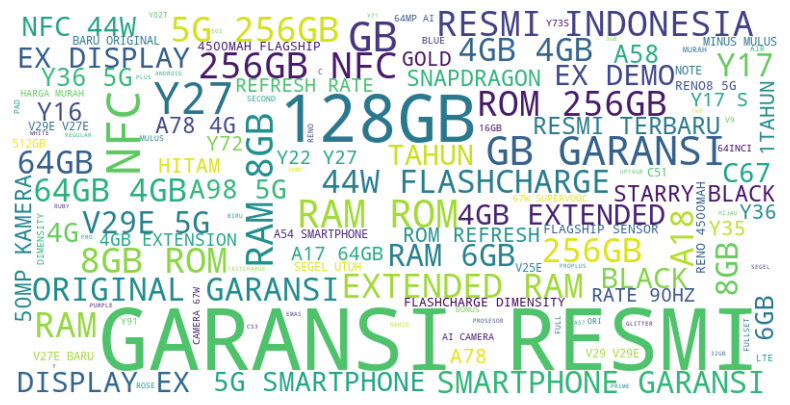

In [17]:
# Make word cloud
word_cloud = WordCloud(width=800, height=400, background_color='white').generate(string_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))

# plt.imshow is to display data in image
# bilinear to smooth and resize image
plt.imshow(word_cloud, interpolation='bilinear')

# to turn off label on axes and ticks
plt.axis('off')
plt.show()

In [18]:
# convert word cloud image into png
word_cloud.to_file("wordcloud.png")

#### **INSIGHT:**
- The word cloud illustrates the frequency of words popping up from the product name. Higher frequency is translated into larger word size.

- The top 7 largest unique keywords are "GARANSI RESMI", "RAM 8GB", "NFC", "128GB","ROM 256GB", and "44W FLASHCHARGE", and "EX DISPLAY".

- So, here's the breakdown of each keyword to understand their relevance to set up features for the new smartphone product:

    - "GARANSI RESMI" means official guarantee from the store when the phone is just purchased.
    - RAM 8GB refers to the amount of memory to to handle and process data simultaneously, shows how smooth when the phone does multitasking.
    - NFC is the short of Near Field Communication, which allows data exchange between devices that are in close proximity to each other.
    - Both 128GB and ROM 256GB refers to the number of internal storage on the phone.
    - 44W FLASHCHARGE refers to a fast-charging technology in which the device is charged at 44-watt.
    - EX DISPLAY means the product used to be a demo product in retail stores. It's not brandly new but the price are usually discounted. Since we are selling new products, EX DISPLAY is not a relevant keyword.


- In conclusion, the new smartphone product should at least include official guarantee, RAM 8GB, NFC feature, internal storage either 128GB or 256GB, and flashcharge technology to compete with existing products.

#### **6. PERFORM STATISTICAL CALCULATION TO DETERMINE MINIMUM AND MAXIMUM PRICE FOR THE NEW PHONE**

Note: Finding Confidence Interval with Bootstrap Method since the product price data is not normally distributed according to D'Agostino's K-squared test.

In [6]:
import numpy as np

# RESAMPLING DATA
def create_bootstrap_sample(data):
    n = len(data)
    bootstrap_sample = np.random.choice(data, size=n, replace=True)
    return bootstrap_sample

In [7]:
# DO STATISTICAL CALCULATION: MEAN
def calculate_bootstrap_statistic(bootstrap_sample):
    return np.mean(bootstrap_sample)  # Change this to the desired statistic


In [8]:
# BUILD SAMPLING DISTRIBUTION BY RESAMPLING THE DATA FROM PRODUCT PRICE 1000 TIMES
num_bootstrap_samples = 1000
bootstrap_statistics = []

for _ in range(num_bootstrap_samples):
    bootstrap_sample = create_bootstrap_sample(clean_data['Product Price'])
    statistic = calculate_bootstrap_statistic(bootstrap_sample)
    bootstrap_statistics.append(statistic)


In [9]:
# Define the desired confidence level (e.g., 95%)
confidence_lvl = 95

# Calculate the lower and upper percentiles based on the confidence level
lower_percent = (100 - confidence_lvl) / 2
upper_percent = 100 - lower_percent

# Calculate the confidence interval using numpy percentiles
confidence_interval = np.percentile(bootstrap_statistics, [lower_percent, upper_percent])

# Display the confidence interval
print(f"Confidence Interval: {confidence_interval}")

Confidence Interval: [2220947.25727273 2502440.84757576]


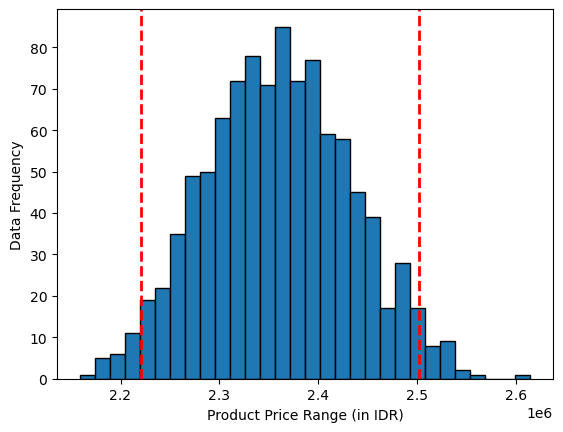

In [10]:
import matplotlib.pyplot as plt

plt.hist(bootstrap_statistics, bins=30, edgecolor='black')
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', linewidth=2)
plt.axvline(confidence_interval[1], color='red', linestyle='dashed', linewidth=2)

plt.xlabel("Product Price Range (in IDR)")
plt.ylabel("Data Frequency")
plt.show()


In [12]:
# Create a DataFrame to store histogram data
histogram_data = pd.DataFrame(bootstrap_statistics, columns=['Product Price Range'])

# Write histogram data to a CSV file
histogram_data.to_csv('histogram_data.csv', index=False)

#### **INSIGHT:**
- The confidence interval result from the bootstrap method is expressed as CI(2221659.42454545 2507817.89454545), showing the range of the estimated reasonable product price with a 95% confidence level.
- The upper limit of the confidence interval (maximum price) is about Rp.2,507,817 or approximately 2.5 million IDR, while the lower limit of the price (minimum price) is about Rp.2,221,659 or about 2.2 million IDR.
- The limits provide the range within which the true population parameter of the product price is estimated, ranging between 2.2 million IDR and 2.5 million IDR.
- In conclusion, it is possible to sell the smartphone more than 1 million IDR in the market if the company sells similar quality smartphones.

## V. CONCLUSION

**IMPORTANT POINTS FROM ANALYSIS:**

1. Research on The Current Market:
- VIVO and OPPO are the top two brands taking a leading position in the smartphone market share (total proportion = 86.1%) with price range from 1 to 5 million IDR.

- Based on word cloud illustration, the smartphones with price range from 1 to 5 million IDR would have key features such as official guarantee, RAM 8GB, NFC feature, internal storage 128GB/256GB, and flashcharge technology.

2. Other Findings:
- The reasonable price to sell smartphones of similar quality sold between 1 and 5 million IDR is ranging from 2.2 million IDR to 2.5 million IDR, according to confidence interval calculation using the bootstrap method.

- Jakarta, Mojokerto, and Kab.Demak are potential places to sell smartphones online considering low market competition level (high number of smartphones sold per store).

- There is no correlation found between product price and rating/total smartphones sold which means price does not affect tendency for customers to buy smartphones. On the other hand, there is a weak negative monotonic and rank relationship between product rating and total smartphones sold indicating that there should be other factors causing customer's purchasing decision.


**SOLUTION FOR INNOVATING NEW SMARTPHONE:**

It is possible, however, challenging to sell a new smartphone brand with price range from 1 to 5 million IDR online considering the reasons:

- The current market share is already highly dominated by the famous brands: VIVO and OPPO. The other brands which came after VIVO and OPPO could only take 13.9% of the total market share for selling similar smartphones.

- Depending on the company's budget, the company needs to consider which key features need to be included in their products so they can sell within the reasonable price range, that is from 2.2 to 2.5 million IDR.

- The company needs to consider selling their new product through other platforms both offline and online to extend their market reach for introducing a new product. In instance, participate in pop-up shops or events, collaborate with social media influencers, in-store promotions can be stimulative for introducing new product to the market.. For strategic locations to sell smartphones online, Jakarta, Mojokerto, and Kab.Demak are recommended.
